In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

In [22]:
all_results = glob('../mvpa_results/exp1_*.csv')
results_df = []
for r in all_results:
    results_df.append(pd.read_csv(r))
results_df = pd.concat(results_df)

In [29]:
results_df.subject_id.nunique()

20

In [14]:
results_df

,sample_idx,true_label,predicted_label,correct,classifier_info,background,congruency,split,direction,hemisphere,n_voxels,roi,subject_id
0,0,0,0,True,0.964676,30deg,congruent,1.0,forward,L,100,ba-17-18,sub-009
1,1,0,1,False,-1.791733,30deg,congruent,1.0,forward,L,100,ba-17-18,sub-009
2,2,0,0,True,1.439486,30deg,congruent,1.0,forward,L,100,ba-17-18,sub-009
3,3,0,0,True,1.632314,30deg,congruent,1.0,forward,L,100,ba-17-18,sub-009
4,4,0,0,True,0.074118,30deg,congruent,1.0,forward,L,100,ba-17-18,sub-009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42235,25,1,0,False,-0.293230,90deg,incongruent,NaN,backward,R,6000,ba-17-18,sub-009
42236,26,1,0,False,-0.779778,90deg,incongruent,NaN,backward,R,6000,ba-17-18,sub-009
42237,27,1,1,True,0.583672,90deg,incongruent,NaN,backward,R,6000,ba-17-18,sub-009
42238,28,1,1,True,0.884639,90deg,incongruent,NaN,backward,R,6000,ba-17-18,sub-009


In [26]:
results_avg = results_df.groupby(['roi', 'subject_id', 'n_voxels', 'congruency']).mean(numeric_only=True).reset_index()

In [27]:
results_avg

,roi,subject_id,n_voxels,congruency,sample_idx,true_label,predicted_label,correct,classifier_info,split
0,ba-17-18,sub-001,100,congruent,11.954545,0.5,0.511364,0.678030,0.429436,2.0
1,ba-17-18,sub-001,100,incongruent,11.954545,0.5,0.471591,0.517045,0.017709,NaN
2,ba-17-18,sub-001,200,congruent,11.954545,0.5,0.500000,0.715909,0.500945,2.0
3,ba-17-18,sub-001,200,incongruent,11.954545,0.5,0.426136,0.517045,0.111330,NaN
4,ba-17-18,sub-001,300,congruent,11.954545,0.5,0.505682,0.736742,0.543236,2.0
...,...,...,...,...,...,...,...,...,...,...
4195,ba-19-37,sub-023,5800,incongruent,11.954545,0.5,0.528409,0.573864,0.036418,NaN
4196,ba-19-37,sub-023,5900,congruent,11.954545,0.5,0.488636,0.549242,0.189179,2.0
4197,ba-19-37,sub-023,5900,incongruent,11.954545,0.5,0.528409,0.573864,0.035566,NaN
4198,ba-19-37,sub-023,6000,congruent,11.954545,0.5,0.494318,0.547348,0.184774,2.0


<Axes: xlabel='n_voxels', ylabel='classifier_info'>

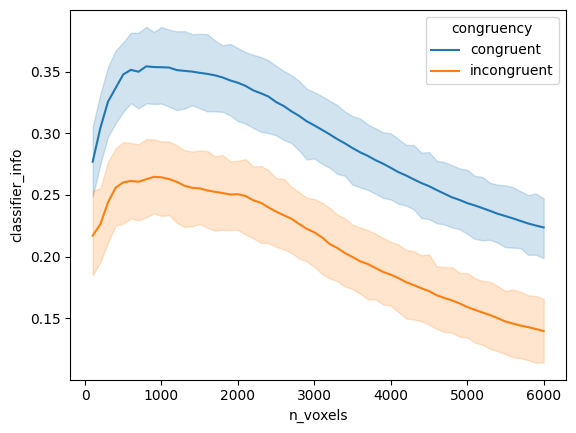

In [33]:
sns.lineplot(data=results_avg[results_avg['roi']=='ba-17-18'], x='n_voxels', y='classifier_info', hue='congruency', errorbar=('ci', 68))